In [43]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter(action='ignore')

In [21]:
crimes = pd.read_csv("NYC_crime.csv")

In [22]:
crimes.head()

,Unnamed: 0,arrest_key,arrest_date,pd_desc,ofns_desc,law_code,law_cat_cd,age_group,perp_sex,perp_race,latitude,longitude,arrest_boro,arrest_precinct,jurisdiction_code,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih
0,0,192799737,2019-01-26,SEXUAL ABUSE,SEX CRIMES,PL 1306503,F,45-64,M,BLACK,40.800694,-73.941109,M,25.0,0.0,7.0,4.0,36.0,16.0
1,1,193260691,2019-02-06,CRIMINAL SALE OF A CONTROLLED SUBSTANCE,CONTROLLED SUBSTANCES OFFENSES,PL 2203400,F,25-44,M,UNKNOWN,40.757839,-73.991212,M,14.0,0.0,12.0,4.0,10.0,8.0
2,2,149117452,2016-01-06,RAPE 3,RAPE,PL 1302503,F,25-44,M,BLACK,40.648650,-73.950336,K,67.0,0.0,61.0,2.0,11.0,40.0
3,3,190049060,2018-11-15,RAPE 1,RAPE,PL 1303501,F,25-44,M,BLACK,40.674583,-73.930222,K,77.0,0.0,16.0,2.0,49.0,49.0
4,4,24288194,2006-09-13,"TRESPASS 3, CRIMINAL",CRIMINAL TRESPASS,PL 140100E,M,45-64,M,BLACK,40.671254,-73.926714,K,77.0,2.0,16.0,2.0,49.0,49.0


In [23]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309169 entries, 0 to 1309168
Data columns (total 19 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Unnamed: 0                   1309169 non-null  int64  
 1   arrest_key                   1309169 non-null  int64  
 2   arrest_date                  1309169 non-null  object 
 3   pd_desc                      1309169 non-null  object 
 4   ofns_desc                    1309169 non-null  object 
 5   law_code                     1309168 non-null  object 
 6   law_cat_cd                   1302726 non-null  object 
 7   age_group                    1309168 non-null  object 
 8   perp_sex                     1309168 non-null  object 
 9   perp_race                    1309168 non-null  object 
 10  latitude                     1309168 non-null  float64
 11  longitude                    1309168 non-null  float64
 12  arrest_boro                  1309168 non-n

In [24]:
crimes_2019 = []
for i in crimes['arrest_date']:
    if '2019' in i:
        crimes_2019.append(i)

In [25]:
crimes_filtered = crimes.loc[crimes['arrest_date'].isin(crimes_2019)]
crimes_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161878 entries, 0 to 162616
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   161878 non-null  int64  
 1   arrest_key                   161878 non-null  int64  
 2   arrest_date                  161878 non-null  object 
 3   pd_desc                      161878 non-null  object 
 4   ofns_desc                    161878 non-null  object 
 5   law_code                     161878 non-null  object 
 6   law_cat_cd                   160820 non-null  object 
 7   age_group                    161878 non-null  object 
 8   perp_sex                     161878 non-null  object 
 9   perp_race                    161878 non-null  object 
 10  latitude                     161878 non-null  float64
 11  longitude                    161878 non-null  float64
 12  arrest_boro                  161878 non-null  object 
 13 

In [26]:
crimes_filtered = crimes_filtered.loc[crimes_filtered['perp_sex']=='M']
crimes_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132164 entries, 0 to 162615
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   132164 non-null  int64  
 1   arrest_key                   132164 non-null  int64  
 2   arrest_date                  132164 non-null  object 
 3   pd_desc                      132164 non-null  object 
 4   ofns_desc                    132164 non-null  object 
 5   law_code                     132164 non-null  object 
 6   law_cat_cd                   131215 non-null  object 
 7   age_group                    132164 non-null  object 
 8   perp_sex                     132164 non-null  object 
 9   perp_race                    132164 non-null  object 
 10  latitude                     132164 non-null  float64
 11  longitude                    132164 non-null  float64
 12  arrest_boro                  132164 non-null  object 
 13 

In [27]:
crimes_filtered['perp_race'].value_counts()

BLACK                             63247
WHITE HISPANIC                    33054
WHITE                             15068
BLACK HISPANIC                    12171
ASIAN / PACIFIC ISLANDER           7280
UNKNOWN                             937
AMERICAN INDIAN/ALASKAN NATIVE      407
Name: perp_race, dtype: int64

In [32]:
crimes_filtered['perp_race'][crimes_filtered['perp_race']=='AMERICAN INDIAN/ALASKAN NATIVE']='Native'
crimes_filtered['perp_race'][crimes_filtered['perp_race']=='BLACK']='Black'
crimes_filtered['perp_race'][crimes_filtered['perp_race']=='WHITE']='White'
crimes_filtered['perp_race'][crimes_filtered['perp_race']=='ASIAN / PACIFIC ISLANDER']='Asian'
crimes_filtered['perp_race'][crimes_filtered['perp_race']=='WHITE HISPANIC']='White Hispanic'
crimes_filtered['perp_race'][crimes_filtered['perp_race']=='BLACK HISPANIC']='Black Hispanic'
crimes_filtered['perp_race'][crimes_filtered['perp_race']=='UNKNOWN']='Unknown'

In [29]:
crimes_filtered['perp_race'].value_counts()

Black             63247
White Hispanic    33054
White             15068
Black Hispanic    12171
Asian              7280
Unknown             937
Native              407
Name: perp_race, dtype: int64

Text(0, 0.5, '')

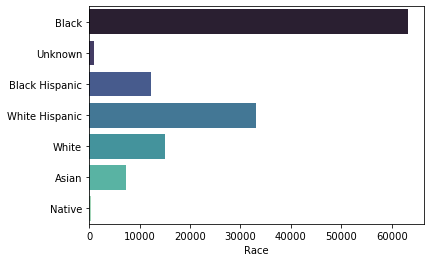

In [73]:
sns.countplot(y="perp_race", 
              data = crimes_filtered, 
              palette="mako")
plt.xlabel("Race")
plt.ylabel("")

Text(0, 0.5, '')

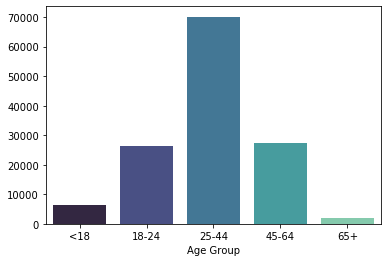

In [62]:
age_order = ["<18","18-24","25-44","45-64","65+"]
qualitative_colors= sns.color_palette("Set3",5)
sns.countplot(x="age_group", 
              data = crimes_filtered, 
              order=age_order, 
              palette="mako")
plt.xlabel("Age Group")
plt.ylabel("")

Text(0, 0.5, '')

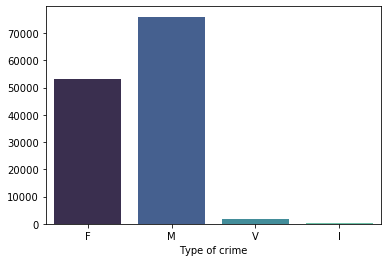

In [65]:
sns.countplot(x="law_cat_cd", 
              data = crimes_filtered,  
              palette="mako")
plt.xlabel("Type of crime")
plt.ylabel("")